<a href="https://colab.research.google.com/github/ibrahim10sy/learn-python/blob/main/Evaluation_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Évaluation du clustering k-means**

**Objectifs**

* Mettre en œuvre et évaluer les performances du clustering k-means sur des données synthétiques
* Interpréter diverses mesures d'évaluation et visualisations
* Comparer les résultats du clustering à ceux de classes connues à l'aide de données synthétiques

# **Introduction**

* Générer des données synthétiques pour réaliser des expériences ciblées avec scikit-learn
* Créer des modèles k-means et évaluer leurs performances comparatives
* Étudier les métriques et techniques d'évaluation pour analyser les résultats du clustering

In [ ]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3
!pip install scipy==1.14.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Patch
from matplotlib import cm

**Fonction d'évaluation du clustering**

Nous allons définir une fonction d'évaluation des modèles de clustering que nous allons construire. Nous inclurons les scores de silhouette et l'indice de Davies-Bouldin, et générerons un graphique affichant les scores de silhouette.

In [2]:
def evaluate_clustering(X, labels, n_clusters, ax=None, title_suffix=''):
    """
    Evaluate a clustering model using silhouette scores and the Davies-Bouldin index.

    Parameters:
    X (ndarray): Matrice des caractéristique.
    labels (array-like): Étiquettes de cluster attribuées à chaque échantillon.
    n_clusters (int): The number of clusters in the model.
    ax: The subplot axes to plot on.
    title_suffix (str): Optional suffix for plot titlec

    Returns:
    None: Displays silhoutte scores and a silhouette plot.
    """
    if ax is None:
        ax = plt.gca()  # Obtenir l'axe actuel si aucun n'est fourni

    # Calcul de silhouette scores
    silhouette_avg = silhouette_score(X, labels)
    sample_silhouette_values = silhouette_samples(X, labels)

    # Plot silhouette analysis on the provided axis
    unique_labels = np.unique(labels)
    colormap = cm.tab10
    color_dict = {label: colormap(float(label) / n_clusters) for label in unique_labels}
    y_lower = 10
    for i in unique_labels:
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = color_dict[i]
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f'Silhouette Score for {title_suffix} \n' +
                 f'Average Silhouette: {silhouette_avg:.2f}')
    ax.set_xlabel('Silhouette Coefficient')
    ax.set_ylabel('Cluster')
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlim([-0.25, 1])  # Set the x-axis range to [0, 1]

    ax.set_yticks([])

**Créez des données synthétiques avec quatre blobs pour expérimenter le clustering k-means.**

Nous allons ici créer des données synthétiques composées de blobs légèrement superposés, puis exécuter et évaluer le clustering k-means avec k = 4 clusters.

Le code  utilise la fonction make_blobs de la bibliothèque sklearn.datasets pour générer des données synthétiques. Voici ce que fait chaque paramètre :

n_samples=500 : Génère 500 échantillons de données.
n_features=2 : Chaque échantillon aura 2 caractéristiques (ou dimensions).
centers=4 : Les données seront générées autour de 4 centres (ou blobs).
cluster_std=[1.0, 3, 5, 2] : Spécifie l'écart-type des blobs. Chaque centre aura un écart-type différent, ce qui signifie que certains blobs seront plus dispersés que d'autres.
random_state=42 : Assure la reproductibilité des résultats en fixant la graine aléatoire.
En résumé, ce code crée un ensemble de données bidimensionnelles avec 500 points répartis autour de 4 centres, chacun ayant une dispersion différente. Ces données sont souvent utilisées pour tester et évaluer des algorithmes de clustering comme K-means.

In [3]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=[1.0, 3, 5, 2], random_state=42)


In [4]:
X

array([[ -6.5397811 ,   5.91717007],
       [-20.36406041,  -7.15158393],
       [ 11.20928764,  -0.45172517],
       [ -2.90130578,   7.55077118],
       [ -0.87355758,  -8.92048646],
       [ -2.72794811, -11.16052872],
       [ -3.71815868,   7.13140312],
       [ -5.52734306,  -7.13130014],
       [  1.43701755,   1.54603123],
       [-10.00372008,  -6.74965434],
       [  2.70016018,  -1.27147433],
       [ -1.35060204,   8.19360381],
       [ 11.03897896,  -3.88309371],
       [ -1.93830711,  10.14985177],
       [ -5.43075291,   3.4968944 ],
       [  7.8151523 ,  -3.30304878],
       [ -2.58120774,  10.01781903],
       [-11.0837718 ,   8.08834241],
       [ -8.67375978,   9.45448367],
       [ -3.6155326 ,   7.8180795 ],
       [  0.44417611,   3.66207739],
       [ -2.30033403,   7.054616  ],
       [  6.36954973,   2.90692015],
       [ -5.7072797 ,   7.19202239],
       [ -9.73119499,   7.7117029 ],
       [ -4.90736648,  -8.985032  ],
       [ -8.15451328,   0.63985535],
 

In [ ]:
y

array([3, 2, 1, 0, 2, 2, 3, 2, 1, 2, 1, 0, 1, 0, 2, 1, 0, 3, 3, 0, 1, 0,
       1, 3, 3, 2, 2, 3, 3, 0, 2, 0, 0, 0, 2, 2, 1, 1, 3, 3, 2, 1, 0, 0,
       0, 1, 1, 1, 2, 3, 2, 0, 3, 2, 1, 0, 0, 3, 2, 3, 3, 0, 2, 3, 1, 2,
       2, 3, 1, 2, 1, 2, 2, 3, 0, 3, 0, 2, 1, 0, 2, 1, 2, 0, 3, 3, 3, 3,
       1, 0, 3, 2, 1, 2, 1, 3, 0, 1, 0, 3, 1, 1, 1, 3, 3, 0, 0, 3, 0, 3,
       2, 3, 3, 3, 3, 2, 1, 3, 2, 2, 0, 1, 2, 1, 3, 1, 1, 2, 2, 3, 3, 1,
       1, 2, 1, 3, 3, 3, 1, 1, 2, 3, 1, 1, 2, 3, 3, 0, 0, 0, 2, 2, 1, 1,
       0, 3, 0, 3, 2, 2, 3, 3, 1, 1, 2, 0, 1, 2, 3, 3, 2, 0, 0, 3, 3, 0,
       0, 2, 2, 2, 0, 3, 0, 0, 3, 3, 0, 1, 0, 2, 2, 3, 3, 2, 0, 2, 0, 0,
       3, 2, 0, 0, 2, 3, 1, 3, 2, 1, 1, 3, 3, 2, 3, 0, 0, 2, 0, 3, 0, 1,
       1, 0, 3, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 3, 2, 0, 2, 1, 1, 1, 2,
       0, 1, 3, 3, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 3, 0, 2, 1, 0, 0, 3, 0,
       2, 2, 1, 0, 1, 2, 0, 0, 1, 3, 0, 0, 0, 1, 3, 2, 0, 1, 1, 0, 2, 0,
       1, 3, 1, 2, 2, 0, 0, 1, 3, 1, 3, 1, 2, 1, 2,

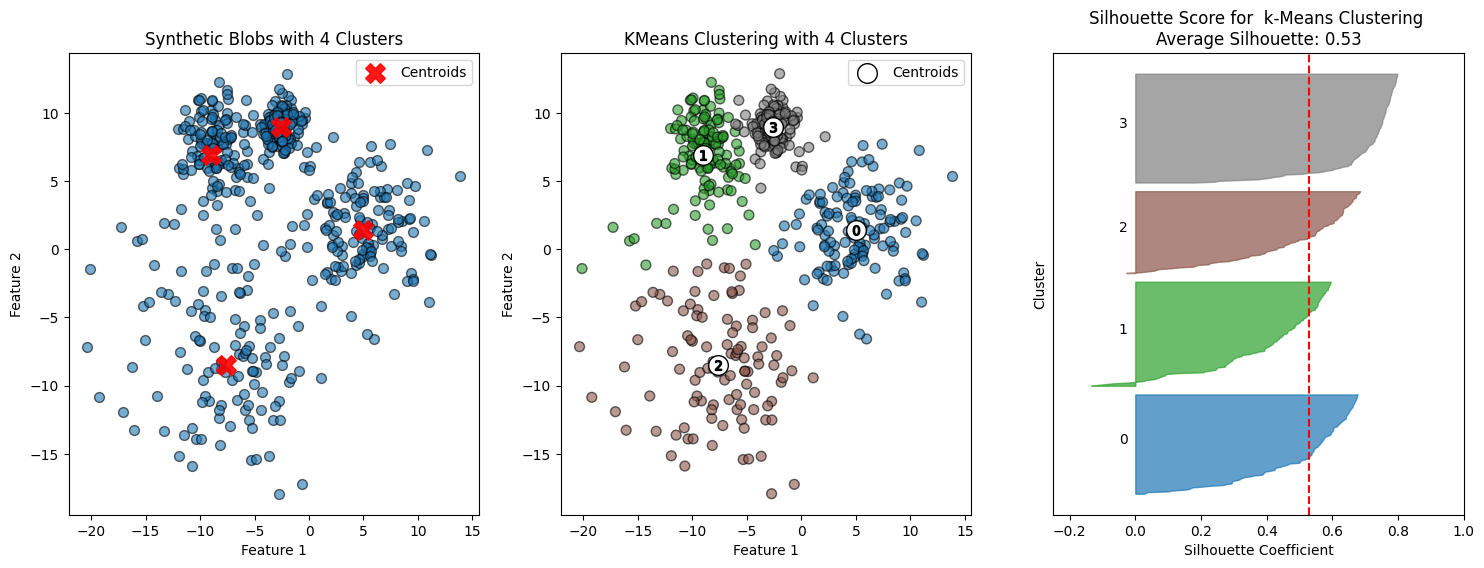

In [7]:

# Appliquer le clustering KMeans
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X)

colormap = cm.tab10

# Plot the blobs
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.6, edgecolor='k')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', alpha=0.9, label='Centroids')
plt.title(f'Synthetic Blobs with {n_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot the clustering result
# Create colors based on the predicted labels
colors = colormap(y_kmeans.astype(float) / n_clusters)

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=colors, s=50, alpha=0.6, edgecolor='k')

# Label the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
    label='Centroids'
)
# Label the custer number
for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

plt.title(f'KMeans Clustering with {n_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Evaluation du clustering
plt.subplot(1, 3, 3)
evaluate_clustering(X, y_kmeans, n_clusters, title_suffix=' k-Means Clustering')
plt.show()

Chaque point d'un graphique en silhouette possède un score compris entre -1 et 1. Un score élevé indique que le point de données est beaucoup plus similaire à son propre cluster qu'à ses clusters voisins. Un score proche de 0 indique que le point se situe à la limite de décision entre deux clusters ou à proximité. Un score négatif indique que le point a peut-être été attribué au mauvais cluster. Nous examinerons le graphique en silhouette plus en détail ultérieurement.

Le résultat du clustering est tout à fait plausible, notamment parce que nous savons déjà qu'il y a quatre blobs dans les données synthétiques. En pratique, cependant, nous ne disposerions pas de cette information.

**Stabilité des clusters**

Comment les résultats évoluent-ils lorsque l'algorithme K-means est exécuté avec différentes valeurs initiales de centroïdes ?

Pour évaluer la stabilité, nous pouvons mesurer l'inertie et faire varier de manière répétée l'initialisation aléatoire des centres des clusters afin d'observer l'impact de la différence de localisation initiale des centroïdes.

L'inertie mesure la compacité des clusters dans l'algorithme K-means. Elle est définie comme la somme des carrés des distances entre chaque point de données et son centroïde. Des valeurs d'inertie plus faibles indiquent des clusters plus compacts et un résultat de clustering potentiellement meilleur. Cependant, l'inertie a tendance à diminuer avec l'augmentation du nombre de clusters ; il est donc important de l'interpréter en parallèle avec d'autres indicateurs.

Pour évaluer la stabilité du clustering, exécuter l'algorithme K-means plusieurs fois avec différents centroïdes initiaux, sans fixer l'état aléatoire, permet de déterminer si l'algorithme produit systématiquement des affectations de clusters et des scores d'inertie similaires. Une inertie constante d'une exécution à l'autre suggère une solution stable, moins dépendante des positions initiales des centroïdes.

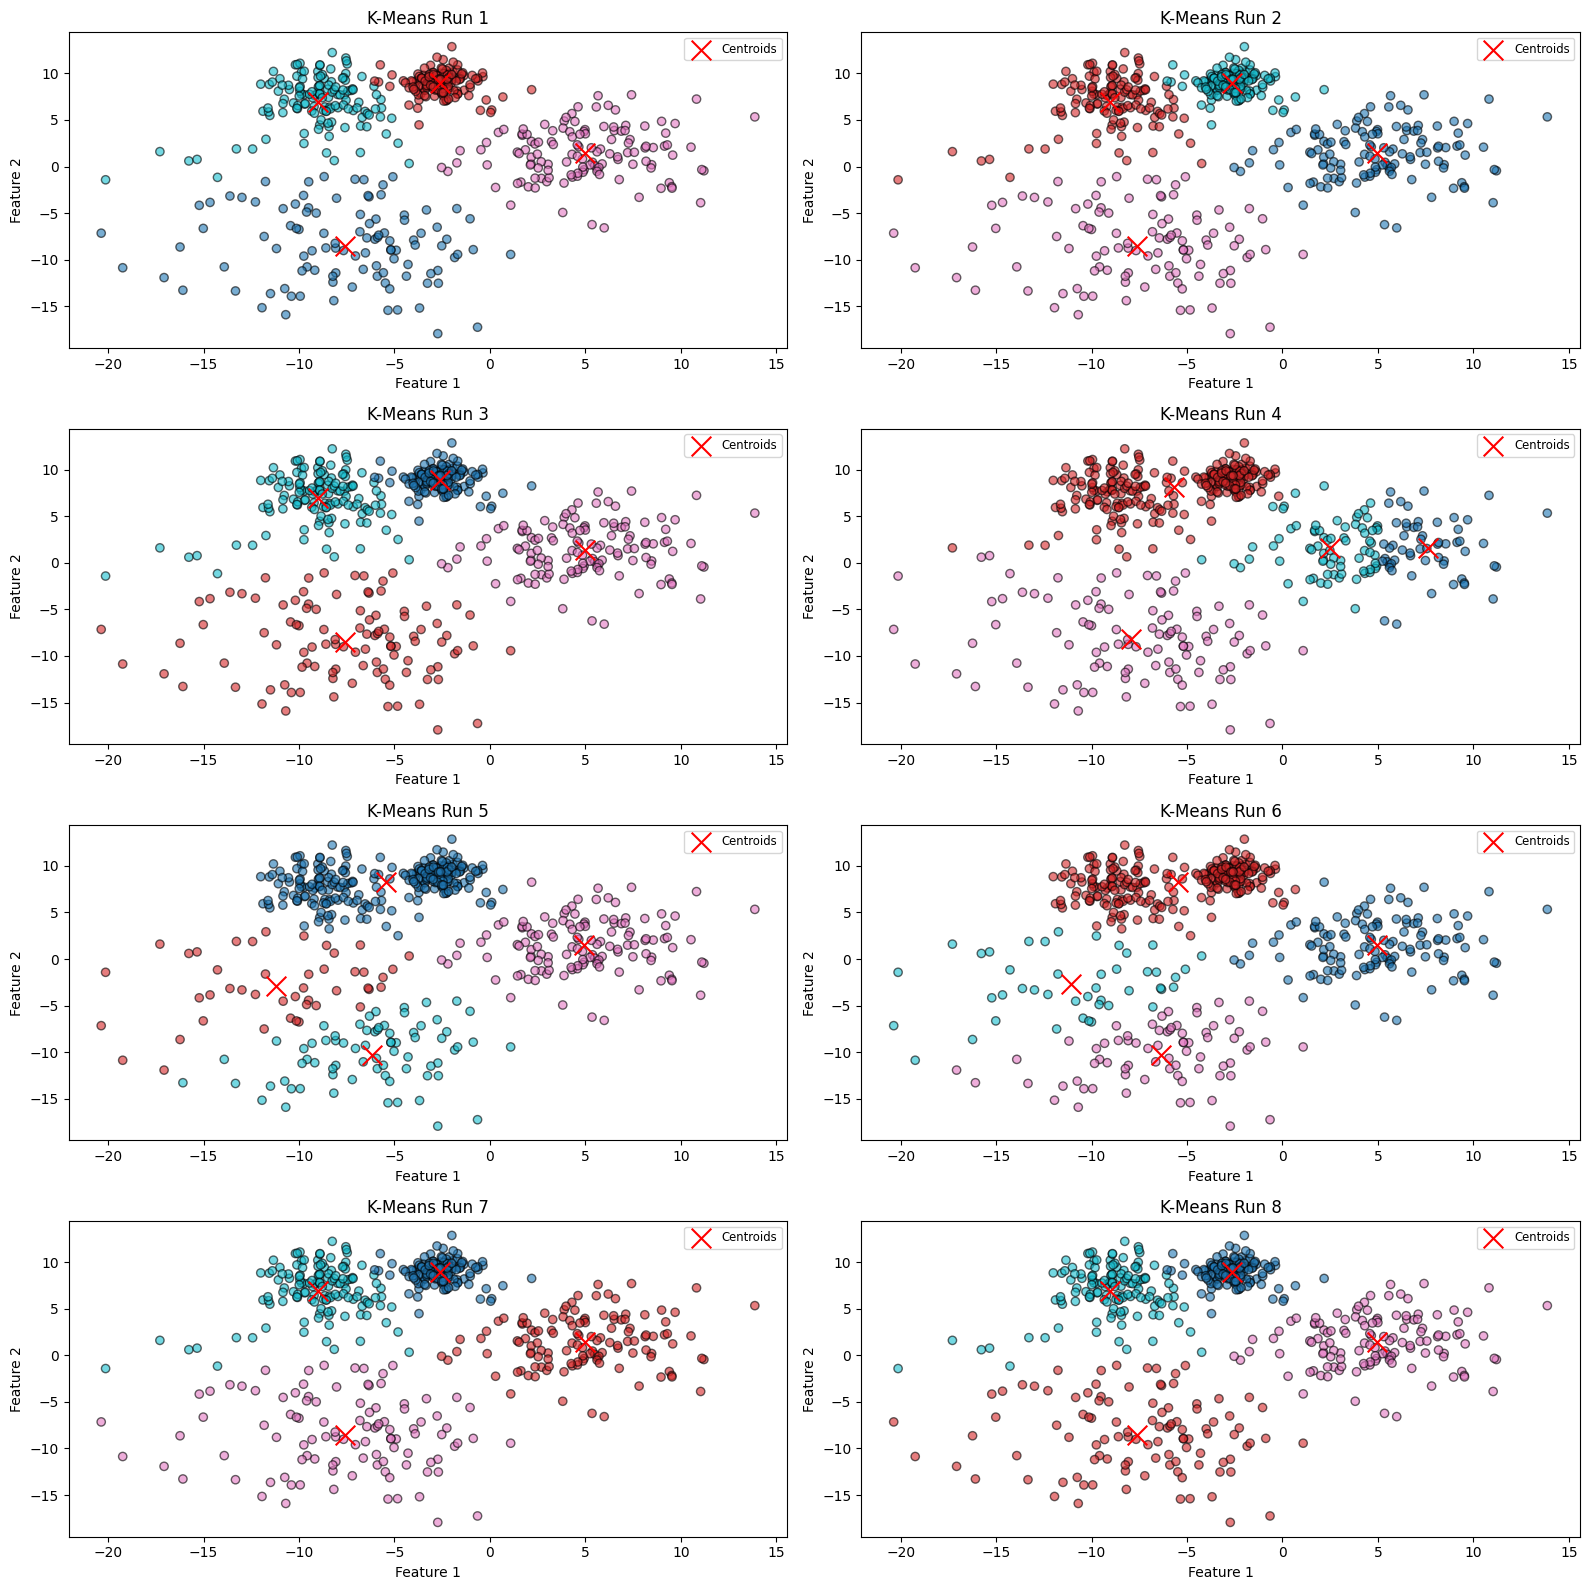

Run 1: Inertia=7633.51
Run 2: Inertia=7633.51
Run 3: Inertia=7633.51
Run 4: Inertia=9680.49
Run 5: Inertia=8556.71
Run 6: Inertia=8557.67
Run 7: Inertia=7633.51
Run 8: Inertia=7633.51


In [ ]:
# Nombre d'exécutions pour k-means avec différents états aléatoires
n_runs = 8
inertia_values = []

# Calculer le nombre de lignes et de colonnes nécessaires aux sous-graphiques
n_cols = 2 # Number of columns
n_rows = -(-n_runs // n_cols) # Division du plafond pour déterminer les rangées
plt.figure(figsize=(16, 16)) # Ajusté la figure pour plus de visualisation

#
for i in range(n_runs):
    kmeans = KMeans(n_clusters=4, random_state=None)  # Use the default `n_init`
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

    # Tracer le résultat du clustering
    plt.subplot(n_rows, n_cols, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='tab10', alpha=0.6, edgecolor='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='x', label='Centroids')
    plt.title(f'K-Means Run {i + 1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()

# Print inertia values
for i, inertia in enumerate(inertia_values, start=1):
    print(f'Run {i}: Inertie={inertia:.2f}')

Comme le montrent les résultats du clustering, l'attribution des clusters varie d'une exécution à l'autre lorsque les centroïdes initiaux sont différents. De plus, les valeurs d'inertie présentent des incohérences, indiquant que le processus de clustering est sensible au placement initial des centroïdes. Cette incohérence inertielle implique un résultat moins fiable.

# **Nombre de clusters**

Comment les indicateurs de performance évoluent-ils avec l'augmentation du nombre de clusters ?

Cette analyse peut-elle vous aider à déterminer le nombre optimal de clusters ?

Pour explorer ce sujet, nous pouvons examiner l'impact de la variation de la valeur de K sur des indicateurs clés tels que l'inertie, l'indice de Davies-Bouldin et les scores de silhouette. En traçant ces scores en fonction de K, nous pouvons analyser les résultats et potentiellement obtenir des informations sur le nombre optimal de clusters pour nos données.

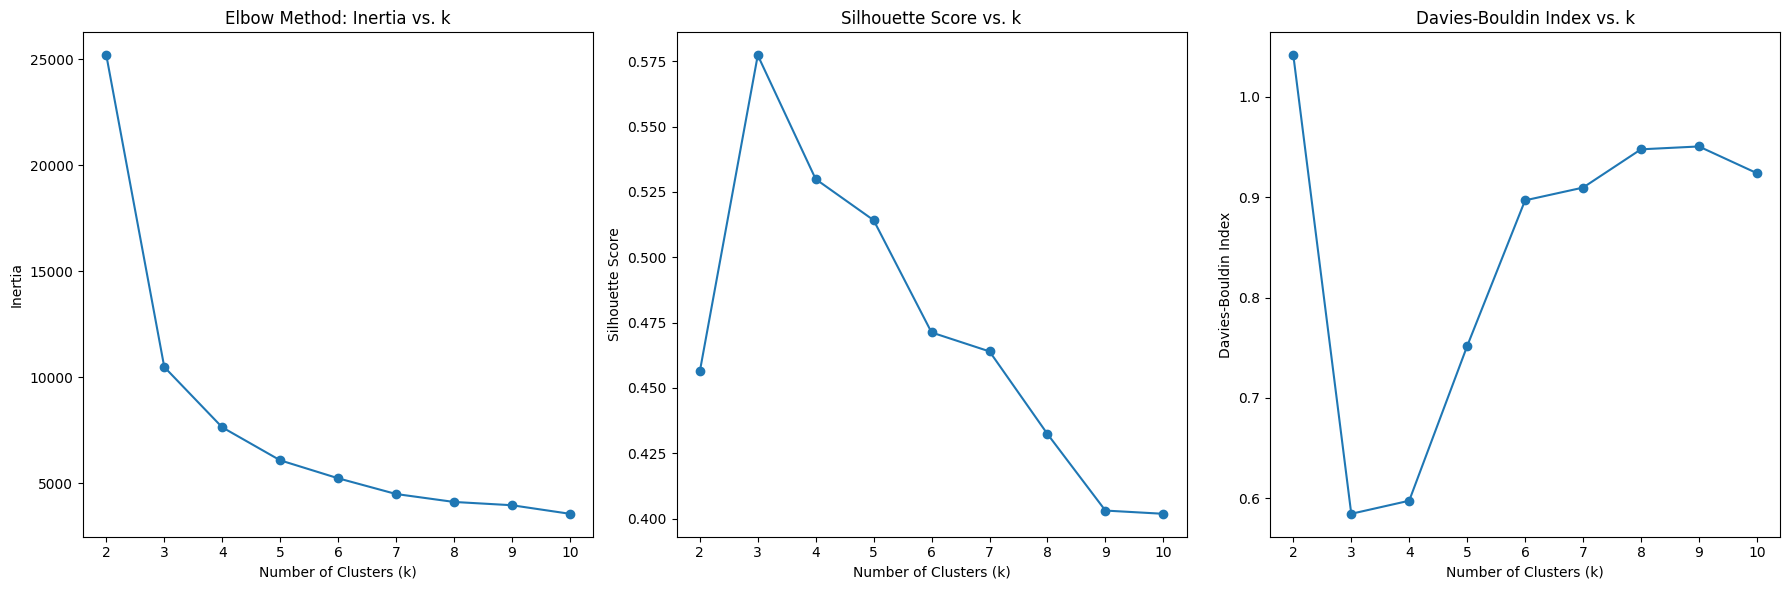

In [8]:
# Range of k values to test
k_values = range(2, 11)

# Store performance metrics
inertia_values = []
silhouette_scores = []
davies_bouldin_indices = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    # Calculate and store metrics
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, y_kmeans))
    davies_bouldin_indices.append(davies_bouldin_score(X, y_kmeans))

# Plot the inertia values (Elbow Method)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method: Inertia vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot silhouette scores
plt.subplot(1, 3, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

# Plot Davies-Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(k_values, davies_bouldin_indices, marker='o')
plt.title('Davies-Bouldin Index vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

**Elbow Method (Inertia vs. k) :**

La courbe montre une forte diminution de l'inertie jusqu'à k = 3, puis la diminution devient plus progressive.

Le "coude" (ou point d'inflexion) est visible autour de k = 3. C'est généralement le point où l'ajout de clusters supplémentaires n'apporte plus de réduction significative de l'inertie, suggérant que k = 3 est un choix optimal.

**Silhouette Score vs. k :**

Le score de silhouette atteint son maximum à k = 3, ce qui indique que la qualité des clusters est la meilleure pour ce nombre de clusters.

Un score plus élevé signifie que les clusters sont bien séparés et compacts.

**Davies-Bouldin Index vs. k :**

Le Davies-Bouldin Index est minimal pour k = 3, indiquant que les clusters sont bien séparés et compacts.

Un indice plus faible est meilleur car il indique des clusters moins similaires entre eux.

Tracez les blobs et les résultats de clustering pour k = 3, 4 et 5

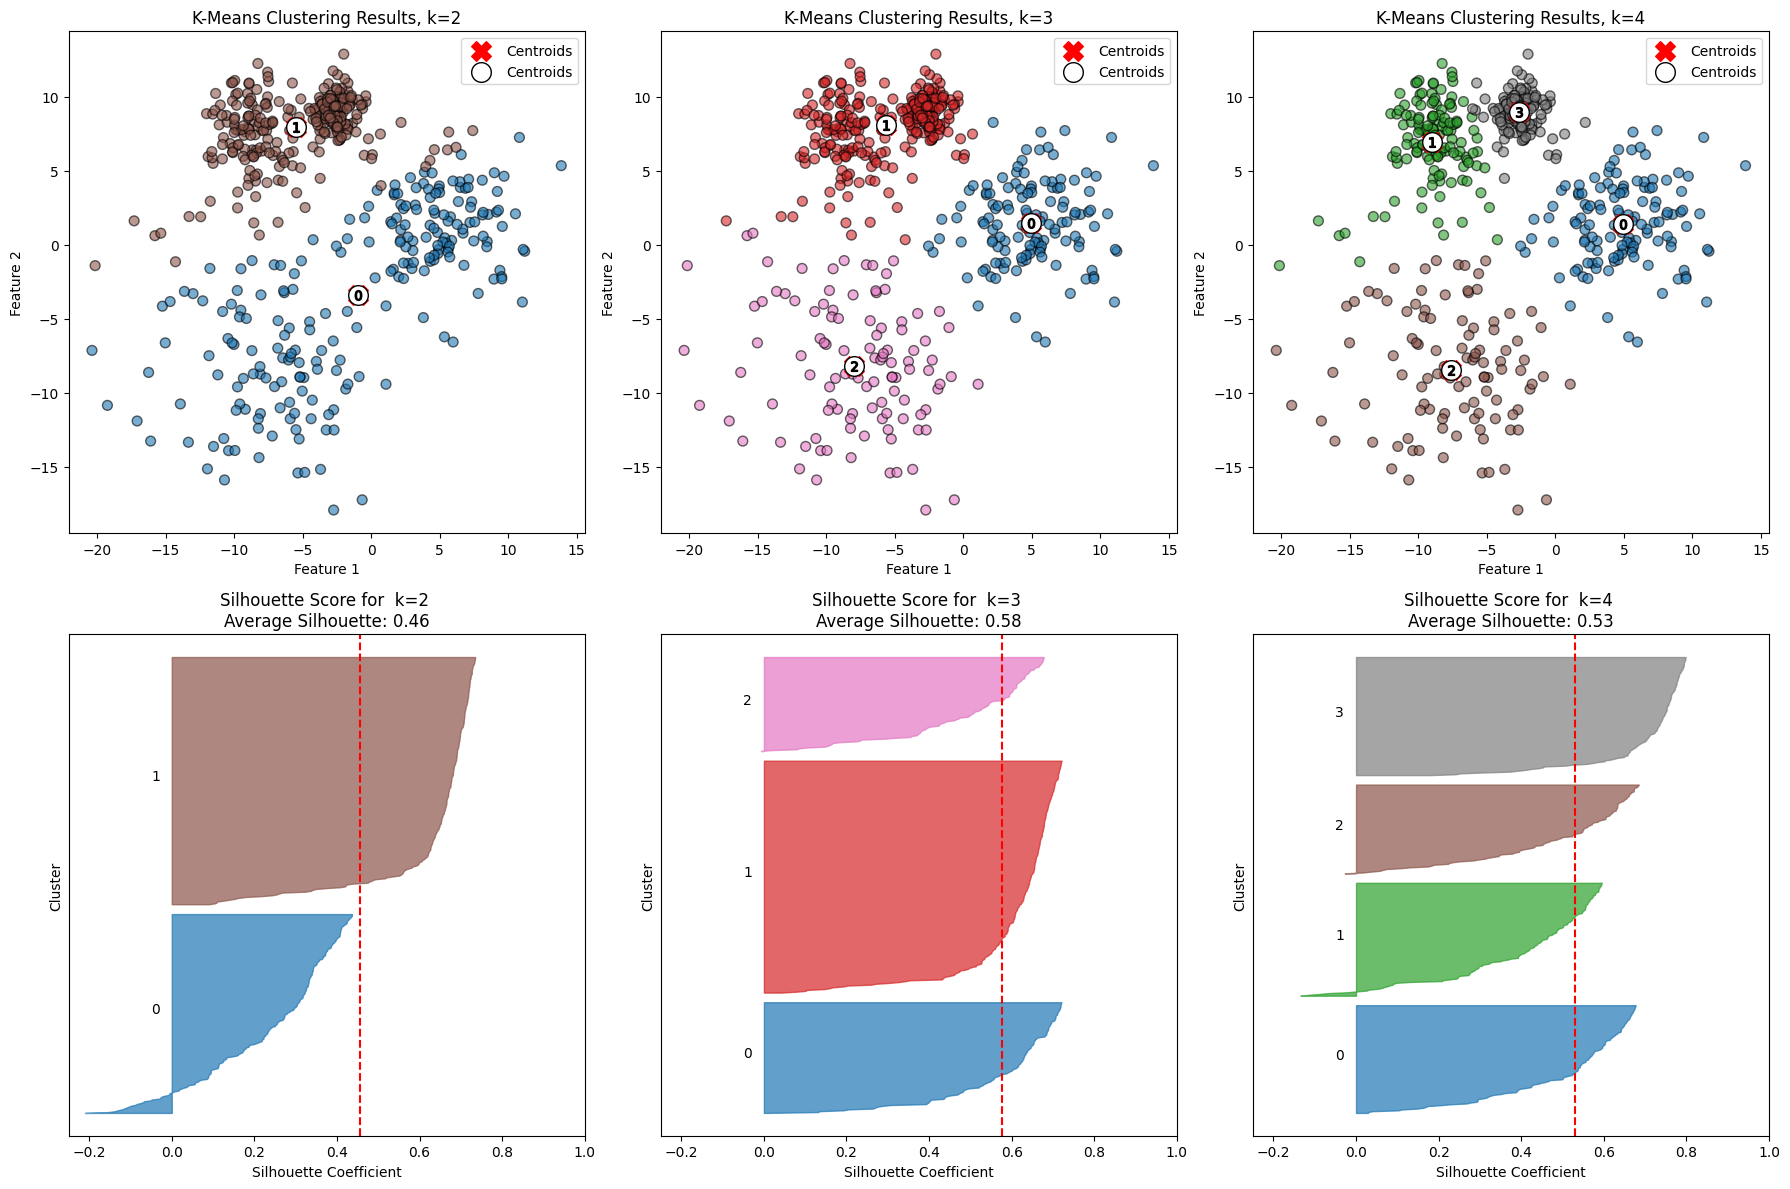

In [9]:
plt.figure(figsize=(18, 12))
colormap = cm.tab10

for i, k in enumerate([2, 3, 4]):
    # Fit KMeans and predict the labels
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    # Create colors based on the predicted labels
    colors = colormap(y_kmeans.astype(float) / k)

    # Scatter plot for each k in the first row (1, 2, 3)
    ax1 = plt.subplot(2, 3, i + 1)
    ax1.scatter(X[:, 0], X[:, 1], c=colors, s=50, alpha=0.6, edgecolor='k')
    ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')

    # Étiquetage des clusters
    centers = kmeans.cluster_centers_

    # Dessinez des cercles blancs aux centres des groupes
    plt.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
        label='Centroids'
    )

    for i_, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker="$%d$" % i_, alpha=1, s=50, edgecolor="k")

    ax1.set_title(f'K-Means Clustering Results, k={k}')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.legend()

    # Silhouette plot for each k in the second row (4, 5, 6)
    ax2 = plt.subplot(2, 3, i + 4)
    evaluate_clustering(X, y_kmeans, k, ax=ax2, title_suffix=f' k={k}')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

Ces résultats sont-ils cohérents avec nos résultats précédents, où nous avons analysé les tracés des métriques d’évaluation par rapport à k ?

L'examen des résultats de clustering pour k = 2, 3 et 4 révèle que le choix intuitif du nombre optimal de clusters est de quatre, bien que l'on puisse également opter pour trois. Pour k = 3, le premier cluster ne permet pas de distinguer deux régions de densités variables, tandis que pour k = 4, ces régions sont divisées en deux clusters distincts (clusters 1 et 3).

Le graphique en silhouette pour k = 4 montre des largeurs de blocs relativement uniformes entre les clusters, suggérant des clusters de tailles similaires. Cependant, la forme de ces blocs indique que de nombreux points sont attribués de manière quelque peu ambiguë, soulignant que les clusters ne sont pas clairement séparés et peuvent se chevaucher dans une certaine mesure.

Déterminer le nombre « correct » de clusters n'est pas simple, car cela implique souvent un jugement subjectif. Les métriques seules indiquent que k = 3 est optimal, étant donné que le graphique en silhouette pour k = 3 montre une meilleure séparation des clusters, avec des scores de silhouette plus élevés et plus cohérents entre les clusters par rapport aux autres choix pour k.

Limites des k-moyennes - Sensibilité à la forme
Savez-vous identifier les situations où les k-moyennes ne seraient pas appropriées ? Quelles alternatives pourraient être utilisées ?

Explorons ces questions à l'aide d'une expérience. À l'aide de make_classification, nous allons créer un jeu de données 2D étiqueté composé de trois classes. Cette fois, nous aurons des ensembles de points de formes différentes dans chaque classe, et non plus seulement des taches sphériques.

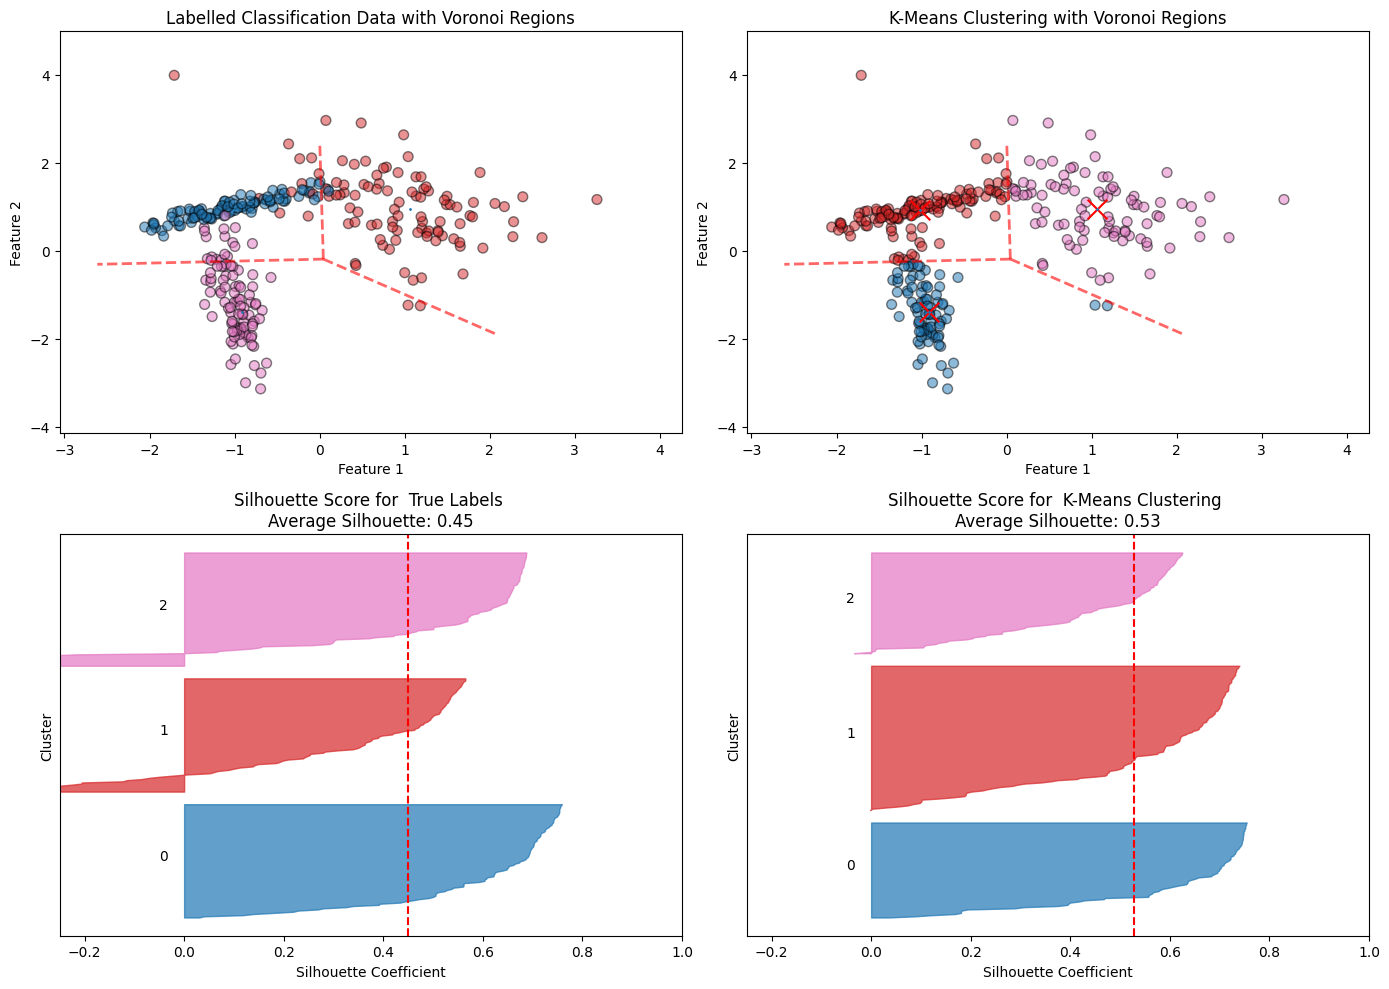

In [10]:
X, y_true = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                                n_clusters_per_class=1, n_classes=3, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Compute the Voronoi diagram
vor = Voronoi(centroids)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Get consistent axis limits for all scatter plots
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Plot the true labels with Voronoi regions
colormap = cm.tab10
colors_true = colormap(y_true.astype(float) / 3)
axes[0, 0].scatter(X[:, 0], X[:, 1], c=colors_true, s=50, alpha=0.5, ec='k')
voronoi_plot_2d(vor, ax=axes[0, 0], show_vertices=False, line_colors='red', line_width=2, line_alpha=0.6, point_size=2)
axes[0, 0].set_title('Labelled Classification Data with Voronoi Regions')
axes[0, 0].set_xlabel('Feature 1')
axes[0, 0].set_ylabel('Feature 2')
axes[0, 0].set_xlim(x_min, x_max)
axes[0, 0].set_ylim(y_min, y_max)

# Call evaluate_clustering for true labels
evaluate_clustering(X, y_true, n_clusters=3, ax=axes[1, 0], title_suffix=' True Labels')

# Plot K-Means clustering results with Voronoi regions
colors_kmeans = colormap(y_kmeans.astype(float) / 3)
axes[0, 1].scatter(X[:, 0], X[:, 1], c=colors_kmeans, s=50, alpha=0.5, ec='k')
axes[0, 1].scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')
voronoi_plot_2d(vor, ax=axes[0, 1], show_vertices=False, line_colors='red', line_width=2, line_alpha=0.6, point_size=2)

axes[0, 1].set_title('K-Means Clustering with Voronoi Regions')
axes[0, 1].set_xlabel('Feature 1')
axes[0, 1].set_ylabel('Feature 2')
axes[0, 1].set_xlim(x_min, x_max)
axes[0, 1].set_ylim(y_min, y_max)

# Call evaluate_clustering for K-Means labels
evaluate_clustering(X, y_kmeans, n_clusters=3, ax=axes[1, 1], title_suffix=' K-Means Clustering')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

La méthode K-means a bien identifié trois clusters globalement cohérents avec les trois classes.
Cependant, en examinant les détails plus fins, la méthode K-means n'a pas pu pleinement saisir la cohérence intrinsèque des deux classes linéaires (violet et vert).

Il convient également de noter que les clusters sont partitionnés d'une manière qui ne reflète pas leur densité.

Les lignes pointillées rouges dans les nuages ​​de points indiquent les limites entre les régions de Voronoï qui séparent les clusters. On ne comprend pas clairement pourquoi les deux points violets situés en bas du cluster jaune ont été mal étiquetés. De même, les points verts entre les deux clusters vert et violet ont été mal étiquetés.

Il est intéressant de noter que le score de silhouette est plus élevé pour le résultat du clustering que pour les étiquettes de classe réelles. Ceci est toutefois logique, car les classes réelles se chevauchent légèrement, comme l'indiquent également les valeurs négatives dans le diagramme de silhouette pour les classes rose et rouge.

N'hésitez pas à explorer différentes approches. Bien sûr, dans les problèmes de clustering réels, vous ne disposez pas de la réponse comme dans cette expérience ; il vous faudra donc faire preuve de créativité. L'algorithme K-means a plutôt bien réussi à identifier trois clusters correspondant en grande partie aux véritables étiquettes de classe. Cependant, un examen plus approfondi révèle que K-means peine à capturer avec précision la structure linéaire allongée des deux classes (représentées en violet et en vert).

Une limitation notable est que K-means ne prend pas efficacement en compte la distribution de densité des points. Les clusters obtenus sont séparés par des limites de type « Voronoï » (indiquées par les lignes pointillées rouges), qui divisent l'espace en régions équidistantes des centroïdes les plus proches. Cette approche suppose intrinsèquement des formes sphériques pour les clusters et peut entraîner une classification erronée des points si la distribution réelle s'écarte de cette hypothèse.

Par exemple, les deux points violets de la partie inférieure du cluster jaune ont été mal classés. De même, certains points verts situés entre les clusters principaux vert et violet ont également été mal étiquetés. Cela met en évidence l'incapacité de K-means à respecter pleinement la continuité des données basée sur la densité.

Une approche de clustering plus flexible, telle que DBSCAN (Density-Based Spatial Clustering of Applications with Noise), pourrait être plus adaptée à ce type de données. DBSCAN prend en compte la densité et peut identifier des clusters de formes et de tailles variées, capturant ainsi potentiellement plus efficacement la structure réelle des données.

Dans les tâches de clustering réelles, la vérité terrain n'est pas connue ; il est donc essentiel d'explorer plusieurs algorithmes et de les adapter aux caractéristiques spécifiques des données. Tester différentes méthodes comme DBSCAN ou le clustering hiérarchique, qui prennent en compte la densité et la proximité de manière non linéaire, pourrait fournir de meilleurs résultats pour les ensembles de données complexes.